<a href="https://colab.research.google.com/github/NourShehab/nlp-project/blob/main/NLP_MS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # For vector operations
import pandas as pd #To handle the dataframe
import matplotlib.pyplot as plt # To display/plot the results and analysis
import re #regular expression to help clean the text
import random
import seaborn as sns

# Importing all classical models from SKlearn which contains all the models predefined
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import sklearn.metrics

import nltk

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/MyDrive/NLP/data/spotify_songs.csv")

Mounted at /content/drive


In [3]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


Data Preperation and Cleaning

In [4]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [6]:
df.describe(include='all')

,artist,song,link,text
count,57650,57650,57650,57650
unique,643,44824,57650,57494
top,Donna Summer,Have Yourself A Merry Little Christmas,/a/abba/ahes+my+kind+of+girl_20598417.html,I just came back from a lovely trip along the ...
freq,191,35,1,6


In [7]:
df.isna().sum().sum()

0

In [8]:
df=df.rename(columns={'text':'lyrics'})

In [9]:
df=df.dropna().drop_duplicates()

In [10]:
df= df.drop(['link'], axis=1)

In [11]:
df= df.drop(['song'], axis=1)

In [12]:
df.head()

,artist,lyrics
0,ABBA,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,I'll never know why I had to go \nWhy I had t...
3,ABBA,Making somebody happy is a question of give an...
4,ABBA,Making somebody happy is a question of give an...


In [13]:
df.describe(include='all')

,artist,lyrics
count,57650,57650
unique,643,57494
top,Donna Summer,I just came back from a lovely trip along the ...
freq,191,6


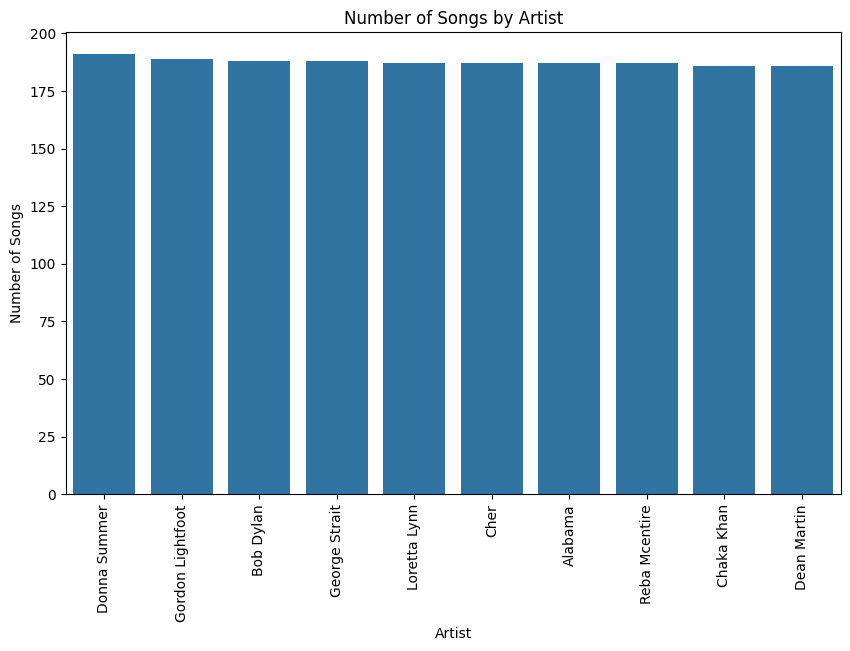

In [14]:
artist_counts = df['artist'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=artist_counts.index, y=artist_counts.values)
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Artist')
plt.xticks(rotation=90)
plt.show()

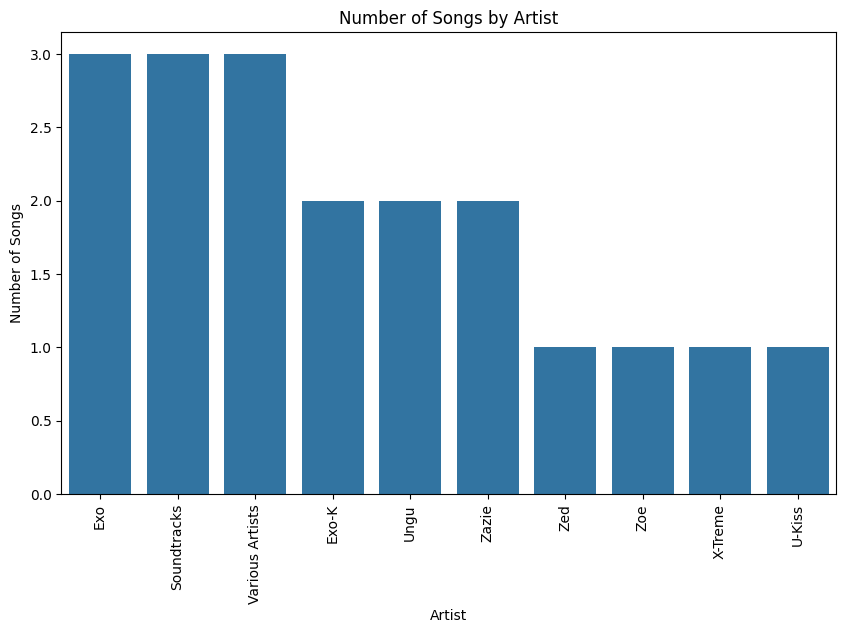

In [15]:
artist_counts = df['artist'].value_counts().tail(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=artist_counts.index, y=artist_counts.values)
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Artist')
plt.xticks(rotation=90)
plt.show()

Cleaning

In [16]:
brief_cleaning= (re.sub("[^A-Za-z']+", ' ',str(row)).lower() for row in df['lyrics'])
df_tmp=pd.DataFrame({'clean':brief_cleaning})
df['lyrics']=df_tmp['clean']
df['lyrics'] = df['lyrics'].str.replace(r'[^\w\s]+', '')
df['lyrics'] = df['lyrics'].str.replace('chorus', ' ', regex=False)
df['lyrics'] = df['lyrics'].str.replace('verse', '', regex=True)
df['lyrics'] = df['lyrics'].str.replace('intro', '', regex=True)
df['lyrics'] = df['lyrics'].str.replace('original', '', regex=True)
df['lyrics'] = df['lyrics'].str.replace('outro', '', regex=True)
df['lyrics'] = df['lyrics'].astype(str)
df['lyrics'] = df['lyrics'].str.replace(r'[^a-zA-Z\s]+', '', regex=True)
df['lyrics'] = [i.lower().replace("\n", "") for i in df['lyrics']]
df['artist']=[i.lower().replace("\n","") for i in df['artist']]
df.head()

,artist,lyrics
0,abba,look at her face its a wonderful face and it m...
1,abba,take it easy with me please touch me gently li...
2,abba,ill never know why i had to go why i had to pu...
3,abba,making somebody happy is a question of give an...
4,abba,making somebody happy is a question of give an...


Tf-idf

In [17]:
tmp=df[["artist","lyrics"]]


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(tmp['lyrics'])
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(tmp['lyrics'])

def wordList_removeStopWords(artist_text):
    stop = stopwords.words('english') + ['\n']
    wordList = []
    for word in word_tokenize(artist_text.lower().strip()):
        if not word in stop:
            wordList= ' '.join([word])
    return wordList


artist_most_frequent_words = {}
for artist, group in tmp.groupby('artist'):
    artist_text = ' '.join(group['lyrics'])

    words_without_stopwords = wordList_removeStopWords(artist_text)

    artist_tfidf_matrix = tfidf_vectorizer.transform([words_without_stopwords])
    max_tfidf_index = artist_tfidf_matrix.argmax()
    #most_frequent_word = tfidf_vectorizer.get_feature_names()[max_tfidf_index]
    most_frequent_word = count_vectorizer.get_feature_names_out()[max_tfidf_index]
    artist_most_frequent_words[artist] = most_frequent_word
artist_most_frequent_words

KeyboardInterrupt: 

In [ ]:
import itertools

newDict = dict(itertools.islice(artist_most_frequent_words.items(), 10))
plt.figure(figsize=(10, 6))
plt.bar(newDict.keys(), newDict.values())
plt.xlabel('Artist')
plt.ylabel('Frequency of Most Common Word')
plt.title('Most Common Word for Each Artist')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:


artist_most_frequent_words["'n Sync"]


In [ ]:
artist_tfidf_most_frequent_word = {}
for artist, word in artist_most_frequent_words.items():
    word_index = tfidf_vectorizer.vocabulary_[word]
    artist_index = tmp[tmp['artist'] == artist].index[0]
    tfidf_score = tfidf_matrix[artist_index, word_index]
    artist_tfidf_most_frequent_word[artist] = tfidf_score



Sampling

In [19]:
df=df.sort_values(by='artist')
first_100_artists=df['artist'].unique()[:100]
df=df[df['artist'].isin(first_100_artists)]
df

,artist,lyrics
13347,'n sync,girl dont say that its over cause you are a pa...
44696,'n sync,would you be my girlfriend repeat x i like you...
44695,'n sync,gotta giddy up yeah n sync giddy up gotta gid...
44694,'n sync,forever young forever young forever young fore...
44693,'n sync,you know that i love you in every way you brin...
...,...,...
29951,dolly parton,bill owens like the morning sun his love move...
29947,dolly parton,aint no use to sit and wonder why babe it dont...
29946,dolly parton,im tempted my darlin to steal you away dont le...
29945,dolly parton,dolly parton our love affair is bitter sweet ...


In [23]:
df['artist_lyrics'] = df.apply(lambda row:  ''.join(row['artist'].split()) + ' ' +' '.join(row['lyrics'].split()[:-1]) , axis=1)


In [24]:

df.head()
#df['artist_first_word'] = df['artist'] + ' ' + df['lyrics'].str.split().str.get()
#df.head()

,artist,lyrics,artist_lyrics
13347,'n sync,girl dont say that its over cause you are a pa...,'nsync girl dont say that its over cause you a...
44696,'n sync,would you be my girlfriend repeat x i like you...,'nsync would you be my girlfriend repeat x i l...
44695,'n sync,gotta giddy up yeah n sync giddy up gotta gid...,'nsync gotta giddy up yeah n sync giddy up got...
44694,'n sync,forever young forever young forever young fore...,'nsync forever young forever young forever you...
44693,'n sync,you know that i love you in every way you brin...,'nsync you know that i love you in every way y...


In [25]:
df['artist_lyrics'].get(0)

'abba look at her face its a wonderful face and it means something special to me look at the way that she smiles when she sees me how lucky can one fellow be shes just my kind of girl she makes me feel fine who could ever believe that she could be mine shes just my kind of girl without her im blue and if she ever leaves me what could i do what could i do and when we go for a walk in the park and she holds me and squeezes my hand well go on walking for hours and talking about all the things that we plan shes just my kind of girl she makes me feel fine who could ever believe that she could be mine shes just my kind of girl without her im blue and if she ever leaves me what could i do what could i'

In [26]:
df['lyrics'].get(0)

'look at her face its a wonderful face and it means something special to me look at the way that she smiles when she sees me how lucky can one fellow be shes just my kind of girl she makes me feel fine who could ever believe that she could be mine shes just my kind of girl without her im blue and if she ever leaves me what could i do what could i do and when we go for a walk in the park and she holds me and squeezes my hand well go on walking for hours and talking about all the things that we plan shes just my kind of girl she makes me feel fine who could ever believe that she could be mine shes just my kind of girl without her im blue and if she ever leaves me what could i do what could i do '

In [27]:
df['song_Length'] = df['lyrics'].str.len()
df['artist_lyrics_len'] = df['artist_lyrics'].str.len()
df.head()

,artist,lyrics,artist_lyrics,song_Length,artist_lyrics_len
13347,'n sync,girl dont say that its over cause you are a pa...,'nsync girl dont say that its over cause you a...,1849,1851
44696,'n sync,would you be my girlfriend repeat x i like you...,'nsync would you be my girlfriend repeat x i l...,1801,1796
44695,'n sync,gotta giddy up yeah n sync giddy up gotta gid...,'nsync gotta giddy up yeah n sync giddy up got...,1414,1412
44694,'n sync,forever young forever young forever young fore...,'nsync forever young forever young forever you...,1453,1453
44693,'n sync,you know that i love you in every way you brin...,'nsync you know that i love you in every way y...,1104,1100


In [28]:


df['lyrics'] = df['lyrics'].apply(lambda x: x.split()[-1])
df.head()

,artist,lyrics,artist_lyrics,song_Length,artist_lyrics_len
13347,'n sync,you,'nsync girl dont say that its over cause you a...,1849,1851
44696,'n sync,girlfriend,'nsync would you be my girlfriend repeat x i l...,1801,1796
44695,'n sync,up,'nsync gotta giddy up yeah n sync giddy up got...,1414,1412
44694,'n sync,young,'nsync forever young forever young forever you...,1453,1453
44693,'n sync,heart,'nsync you know that i love you in every way y...,1104,1100


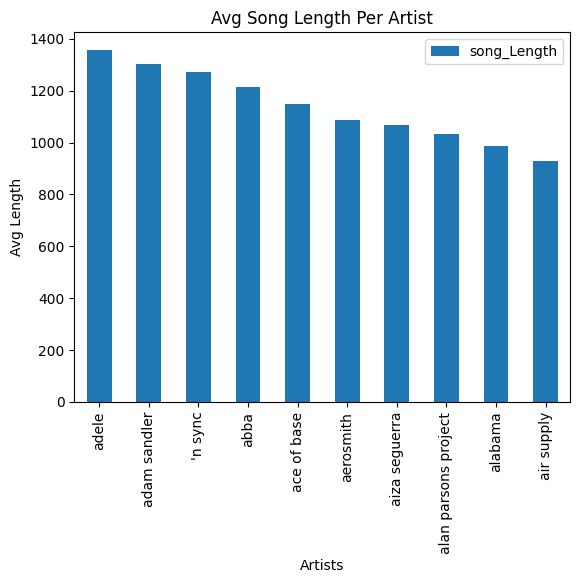

In [29]:
grouped= df.groupby(['artist'])['song_Length'].mean().reset_index().head(10)
grouped=grouped.sort_values('song_Length',ascending=False)
grouped.plot.bar(x="artist", y="song_Length",title='Avg Song Length Per Artist', ylabel='Avg Length',
         xlabel='Artists',)
plt.show()

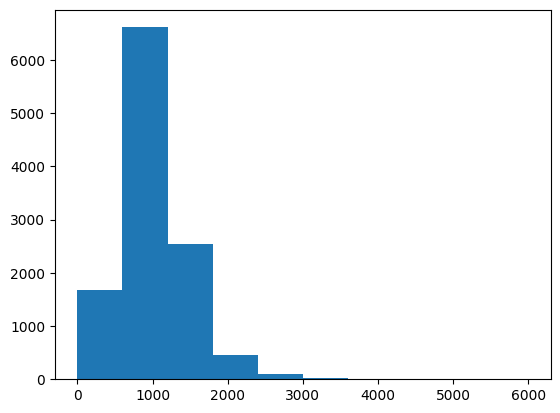

In [30]:
plt.hist(df['song_Length'].values,range=(0,6000))
plt.show()

In [31]:
df['song_Length'].max()

3668

In [32]:
df= df.drop(['artist'], axis=1)
df.head()

,lyrics,artist_lyrics,song_Length,artist_lyrics_len
13347,you,'nsync girl dont say that its over cause you a...,1849,1851
44696,girlfriend,'nsync would you be my girlfriend repeat x i l...,1801,1796
44695,up,'nsync gotta giddy up yeah n sync giddy up got...,1414,1412
44694,young,'nsync forever young forever young forever you...,1453,1453
44693,heart,'nsync you know that i love you in every way y...,1104,1100


In [33]:
df.shape

(11418, 4)

In [34]:
df[df['song_Length'] >2500].count()

lyrics               86
artist_lyrics        86
song_Length          86
artist_lyrics_len    86
dtype: int64

In [35]:
df=df[df['song_Length']<=1500]

In [36]:
df['artist_lyrics_len'].max()

1511

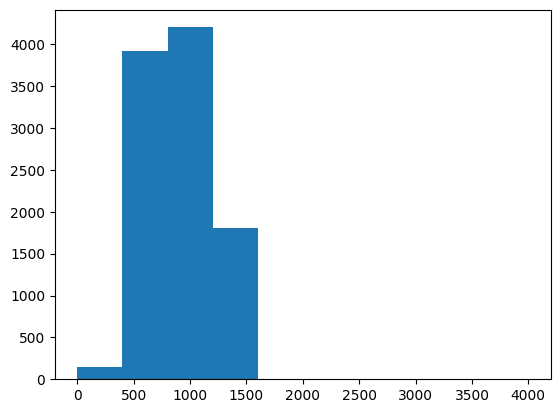

In [37]:
plt.hist(df['artist_lyrics_len'].values,range=(0,4000))
plt.show()

In [38]:
df['artist_lyrics_len'].count()

10070

In [39]:
df[df['artist_lyrics_len'] >1500].count()

lyrics               25
artist_lyrics        25
song_Length          25
artist_lyrics_len    25
dtype: int64

In [40]:
df=df[df['artist_lyrics_len']<=1500]

In [41]:
df.shape

(10045, 4)

In [42]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [43]:
terms = tf.ragged.constant(df["lyrics"].values)

In [44]:


unique_values = tf.unique(terms).y
unique_count = tf.size(unique_values)
print(f"Number of unique values: {unique_count}")


Number of unique values: 2243


In [45]:
lookup = tf.keras.layers.StringLookup(output_mode="one_hot", max_tokens=None)
lookup.adapt(terms)
vocab = lookup.get_vocabulary()



Vocabulary:
['[UNK]', 'you', 'me', 'love', 'x', 'again', 'yeah', 'away', 'go', 'now', 'home', 'on', 'tonight', 'day', 'time', 'do', 'heart', 'down', 'way', 'baby', 'fade', 'night', 'oh', 'more', 'it', 'mine', 'man', 'repeat', 'all', 'out', 'know', 'life', 'mind', 'be', 'gone', 'world', 'there', 'right', 'eyes', 'alone', 'up', 'anymore', 'one', 'girl', 'true', 'die', 'goodbye', 'cry', 'back', 'today', 'no', 'blue', 'i', 'forever', 'by', 'here', 'end', 'free', 'town', 'too', 'see', 'blues', 'alright', 'la', 'dream', 'long', 'light', 'around', 'to', 'so', 'road', 'rain', 'name', 'am', 'song', 'own', 'inside', 'in', 'her', 'alive', 'thing', 'stay', 'sky', 'say', 'lord', 'dance', 'soul', 'moon', 'dreams', 'that', 'morning', 'come', 'are', 'year', 'shine', 'fire', 'boy', 'wrong', 'will', 'why', 'through', 'ooh', 'fly', 'woman', 'sea', 'line', 'him', 'hey', 'hand', 'ground', 'good', 'done', 'days', 'christmas', 'wind', 'together', 'this', 'run', 'myself', 'fool', 'enough', 'dead', 'believe', 

In [77]:


def get_word_from_probability(probabilities, vocab):

  max_index = np.argmax(probabilities)
  word = vocab[max_index]

  return word


Splitting data

In [46]:
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df,test_size=0.2,random_state=42)

In [47]:
X_train = train_df['artist_lyrics']
Y_train = train_df['lyrics']
X_test = test_df['artist_lyrics']
Y_test = test_df['lyrics']

In [48]:
labels = tf.ragged.constant(train_df['lyrics'].values)
label_binarized = lookup(labels).numpy()

In [49]:
labels_val = tf.ragged.constant(test_df['lyrics'].values)
label_binarized_val = lookup(labels_val).numpy()

In [67]:
label_binarized_val.shape


(2009, 2244)

In [68]:
X_test.shape

(2009, 1500)

In [51]:
X_train[:3]

26001    bobseger i wasnt born lookin back i cant tell ...
28612    danfogelberg joy at the start fear in the jour...
23311    alanparsonsproject when you were standing in t...
Name: artist_lyrics, dtype: object

Model

In [52]:

embedding_dim = 64
units = 128
trunc_type='post'
padding_type='post'
max_length=1500

In [53]:
tokenizer =Tokenizer(num_words=None,#By default the value of num_words is none  best value is the vocab_size
                      filters='!"$%&()*,-./:;<=>?@[\\]^_`{|}~\t\n', #filter the text from punctuation we kept # and + for C# and C++
                      lower=True,
                      split=" ",#if you split with , or something else then this will be your splitter
                      char_level=False, #tokenization as char level or word level
                      oov_token=None) #what to replace an oov word with during training validation or testing

In [54]:
tokenizer.fit_on_texts(train_df['artist_lyrics'].values)

In [55]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'you': 3,
 'to': 4,
 'and': 5,
 'a': 6,
 'me': 7,
 'in': 8,
 'my': 9,
 'of': 10,
 'it': 11,
 'your': 12,
 'that': 13,
 'on': 14,
 'love': 15,
 'all': 16,
 'be': 17,
 'im': 18,
 'is': 19,
 'for': 20,
 'so': 21,
 'dont': 22,
 'but': 23,
 'its': 24,
 'just': 25,
 'know': 26,
 'we': 27,
 'no': 28,
 'with': 29,
 'when': 30,
 'oh': 31,
 'like': 32,
 'can': 33,
 'this': 34,
 'if': 35,
 'do': 36,
 'what': 37,
 'now': 38,
 'got': 39,
 'up': 40,
 'time': 41,
 'go': 42,
 'youre': 43,
 'was': 44,
 'one': 45,
 'down': 46,
 'will': 47,
 'are': 48,
 'out': 49,
 'have': 50,
 'never': 51,
 'want': 52,
 'see': 53,
 'baby': 54,
 'get': 55,
 'she': 56,
 'cant': 57,
 'come': 58,
 'say': 59,
 'they': 60,
 'he': 61,
 'way': 62,
 'not': 63,
 'as': 64,
 'ill': 65,
 'let': 66,
 'from': 67,
 'there': 68,
 'at': 69,
 'take': 70,
 'heart': 71,
 'were': 72,
 'well': 73,
 'away': 74,
 'her': 75,
 'ive': 76,
 'make': 77,
 'night': 78,
 'how': 79,
 'yeah': 80,
 'gonna': 81,
 'life': 82,
 'day': 83

In [56]:
vocab_size = len(tokenizer.word_index) + 1
X_train = tokenizer.texts_to_sequences(train_df['artist_lyrics'].values)
X_test = tokenizer.texts_to_sequences(test_df['artist_lyrics'].values)

In [57]:
vocab_size

25477

In [58]:
X_train = pad_sequences(X_train, padding='post', maxlen=max_length)
X_test = pad_sequences(X_test, padding='post', maxlen=max_length)

In [ ]:
# tokenizer_lyrics =Tokenizer(num_words=None,
#                       filters='!"$%&()*,-./:;<=>?@[\\]^_`{|}~\t\n',
#                       lower=True,
#                       split=" ",
#                       char_level=False,
#                       oov_token=None)

In [ ]:
# tokenizer_lyrics.fit_on_texts(train_df['lyrics'].values)
# Y_train = tokenizer_lyrics.texts_to_sequences(train_df['lyrics'].values)
# Y_test = tokenizer_lyrics.texts_to_sequences(test_df['lyrics'].values)

In [ ]:
# Y_train = pad_sequences(Y_train, padding='post', maxlen=1500) #post so padding will be added at the end
# Y_test = pad_sequences(Y_test, padding='post', maxlen=1500)

In [ ]:
# Y_train[0]

array([ 83, 336,   6, ...,   0,   0,   0], dtype=int32)

In [59]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.GRU(units),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(lookup.vocabulary_size(), activation='sigmoid')
# ])
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_shape=(max_length,)),
    tf.keras.layers.GRU(units),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(lookup.vocabulary_size(), activation='sigmoid')
])

# Set the training parameters
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [60]:
X_train.shape

(8036, 1500)

In [61]:
Y_train.shape

(8036,)

In [62]:
label_binarized.shape

(8036, 2244)

In [63]:
model.fit(X_train, label_binarized, epochs=1)

252/252 [==============================] - 390s 2s/step - loss: 6.7463 - accuracy: 0.0535


In [70]:
oss, accuracy = model.evaluate(X_test, label_binarized_val)
print("Training Accuracy: {:.2f}%".format(accuracy * 100))
print('Accuracy: %f' % (accuracy*100))

63/63 [==============================] - 20s 304ms/step - loss: 6.5624 - accuracy: 0.0572
Training Accuracy: 5.72%
Accuracy: 5.724241


In [71]:
test_df

,lyrics,artist_lyrics,song_Length,artist_lyrics_len
25330,day,billieholiday like the beat beat beat of the t...,792,801
26793,you,carlysimon feat the pointer sisters tonights t...,1181,1186
27356,place,cher love is a lonely place without you withou...,1112,1110
25727,here,blur st louis song something is wrong i kill t...,713,712
936,say,avrillavigne oh how i wish that they would las...,793,801
...,...,...,...,...
3689,it,davematthewsband ten fingers we have each nine...,808,821
25183,go,bettemidler five six five six seven lets go le...,1053,1061
4280,wind,dollyparton how many roads must a man walk dow...,1044,1050
27850,time,christmassongs the fire is burning the rooms a...,1120,1129


In [73]:
testing_text= test_df['artist_lyrics'][25330]
actual_class=test_df['lyrics'][25330]
print(testing_text)
print(actual_class)


billieholiday like the beat beat beat of the tomtom when the jungle shadows fall like the tick tick tock of the stately clock as it stands against the wall like the drip drip drip of the raindrops when the summer showare is through so a voice within me keeps repeating you you you night and day you are the one only you beneath the moon and sun whether near me or far its no matter darling where you are i think of you night and day day and night why is it so that this longing for you follows wherever i go in the roaring traffics boom in the silence of my lonely room i think of you night and day night and day under the hide of me theres an oh such a hungry yearning burning inside of me and its torment wont be trough till you spent my life making love to you day and night night and day night and
day


In [74]:
test_seq=tokenizer.texts_to_sequences([testing_text])
test_seq=pad_sequences(test_seq, padding='post', maxlen=max_length)
predictions=model.predict(test_seq)
predictions

1/1 [==============================] - 1s 772ms/step


array([[0.01514534, 0.9351126 , 0.9139414 , ..., 0.02087629, 0.01192329,
        0.01262974]], dtype=float32)

In [78]:
get_word_from_probability(predictions,vocab)

'you'